# COMP4096 Business Intelligence Group Project
## COVID-19 Data Analysis and Prediction (U.S.A Data)

#### This part is written by Wong Tin Yau David (18207871).

##### Datasets below are downloaded from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv, which is provided by https://ourworldindata.org/. (An Open Source Project). With Filtering (only select data after 2021 because vaccines releases in this year and we would like to see the effectiveness)

### 1. Import Data 'owid-covid-data_2021.csv'

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/dtywong/covid19-data-analysis/main/owid-covid-data_2021.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,1/1/2021,51526.0,0.0,102.286,2191.0,0.0,7.429,1323.612,0.000,2.628,56.283,0.000,0.191,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2/1/2021,51526.0,0.0,91.429,2191.0,0.0,6.000,1323.612,0.000,2.349,56.283,0.000,0.154,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,3/1/2021,51526.0,0.0,69.571,2191.0,0.0,4.429,1323.612,0.000,1.787,56.283,0.000,0.114,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,4/1/2021,53011.0,1485.0,247.286,2237.0,46.0,9.000,1361.759,38.147,6.352,57.465,1.182,0.231,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,5/1/2021,53105.0,94.0,250.714,2244.0,7.0,9.286,1364.173,2.415,6.440,57.644,0.180,0.239,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [2]:
df.shape

(23648, 59)

### 2. Select the data only from U.S.A only

In [3]:
usadf = df[(df["location"]=='United States')]
usadf.shape

(112, 59)

In [4]:
usadf.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
22416,USA,North America,United States,1/1/2021,20252991.0,153628.0,197112.571,354232.0,2149.0,2614.857,61186.795,464.129,595.501,1070.179,6.492,7.900,1.07,27426.0,82.857,120802.0,364.958,NaN,NaN,NaN,NaN,1236939.0,258037498.0,779.563,3.737,1483797.0,4.483,0.131,7.6,tests performed,NaN,NaN,NaN,NaN,302329.0,NaN,NaN,NaN,904.0,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
22417,USA,North America,United States,2/1/2021,20553301.0,300310.0,207687.143,356739.0,2507.0,2703.857,62094.068,907.274,627.449,1077.753,7.574,8.169,1.10,27583.0,83.332,122532.0,370.184,NaN,NaN,NaN,NaN,1104889.0,259142387.0,782.901,3.338,1501500.0,4.536,0.139,7.2,tests performed,4225756.0,4225756.0,NaN,NaN,325882.0,1.26,1.26,NaN,974.0,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
22418,USA,North America,United States,3/1/2021,20762047.0,208746.0,215274.429,358186.0,1447.0,2706.714,62724.716,630.648,650.371,1082.124,4.372,8.177,1.10,28022.0,84.658,125472.0,379.066,NaN,NaN,112327.0,339.354,1036590.0,260178977.0,786.033,3.132,1516015.0,4.580,0.143,7.0,tests performed,NaN,NaN,NaN,NaN,336949.0,NaN,NaN,NaN,1007.0,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
22419,USA,North America,United States,4/1/2021,20946329.0,184282.0,216652.714,360278.0,2092.0,2719.429,63281.455,556.739,654.535,1088.444,6.320,8.216,1.10,28286.0,85.456,127349.0,384.737,NaN,NaN,NaN,NaN,1390411.0,261569388.0,790.234,4.201,1531356.0,4.626,0.142,7.0,tests performed,4563260.0,4563260.0,NaN,NaN,348017.0,1.36,1.36,NaN,1041.0,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
22420,USA,North America,United States,5/1/2021,21181440.0,235111.0,221632.571,363991.0,3713.0,2731.143,63991.754,710.299,669.579,1099.662,11.217,8.251,1.11,28543.0,86.232,128766.0,389.018,NaN,NaN,NaN,NaN,1943212.0,263512600.0,796.104,5.871,1544244.0,4.665,0.143,7.0,tests performed,4836469.0,4836469.0,NaN,273209.0,339372.0,1.45,1.45,NaN,1015.0,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [5]:
droppable_features = []

### 3. Seach columns with mostly-missing values and drop columns with over 99% missing values

In [6]:
(usadf.isnull().sum()/usadf.shape[0]).sort_values(ascending=False)

handwashing_facilities                   1.000000
weekly_icu_admissions                    1.000000
weekly_icu_admissions_per_million        1.000000
weekly_hosp_admissions                   0.857143
weekly_hosp_admissions_per_million       0.857143
people_fully_vaccinated_per_hundred      0.151786
people_fully_vaccinated                  0.151786
new_vaccinations                         0.116071
people_vaccinated                        0.080357
people_vaccinated_per_hundred            0.080357
total_vaccinations                       0.071429
total_vaccinations_per_hundred           0.071429
icu_patients_per_million                 0.044643
hosp_patients                            0.044643
hosp_patients_per_million                0.044643
icu_patients                             0.044643
new_tests_smoothed                       0.017857
tests_per_case                           0.017857
total_tests                              0.017857
total_tests_per_thousand                 0.017857


In [7]:
droppable_features.append('weekly_icu_admissions_per_million')
droppable_features.append('weekly_icu_admissions')
droppable_features.append('handwashing_facilities')

### 4. Selected skewed (Skewness > 10) columns and drop columns with over 99% values.

In [8]:
droppable_features.append('iso_code')
droppable_features.append('continent')
droppable_features.append('life_expectancy')
droppable_features.append('hospital_beds_per_thousand')
droppable_features.append('male_smokers')
droppable_features.append('female_smokers')
droppable_features.append('diabetes_prevalence')
droppable_features.append('cardiovasc_death_rate')
droppable_features.append('extreme_poverty')
droppable_features.append('gdp_per_capita')
droppable_features.append('aged_70_older')
droppable_features.append('aged_65_older')
droppable_features.append('median_age')
droppable_features.append('population_density')
droppable_features.append('population')
droppable_features.append('tests_units')
droppable_features.append('human_development_index')
droppable_features.append('location')
droppable_features.append('stringency_index')

In [9]:
usadf.drop(droppable_features, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
#pd.options.display.float_format = '{:,.4f}'.format
#sk_df = pd.DataFrame([{'column': c, 'uniq': usadf[c].nunique(), 'skewness': usadf[c].value_counts(normalize=True).values[0] * 100} for c in usadf.columns])
#sk_df = sk_df.sort_values('skewness', ascending=False)
#sk_df

In [11]:
#droppable_features.extend(sk_df[sk_df.skewness > 99].column.tolist())
#usadf.drop(droppable_features, axis=1, inplace=True)

In [12]:
usadf.shape

(112, 37)

### 5. Find columns that have more than 10% of missing values and filled with means or 0.

In [13]:
null_counts = usadf.isnull().sum()
null_counts = null_counts / usadf.shape[0]
null_counts[null_counts > 0.1]

weekly_hosp_admissions                 0.857143
weekly_hosp_admissions_per_million     0.857143
people_fully_vaccinated                0.151786
new_vaccinations                       0.116071
people_fully_vaccinated_per_hundred    0.151786
dtype: float64

In [14]:
usadf.people_fully_vaccinated.fillna(0, inplace=True)
usadf.new_vaccinations.fillna(0, inplace=True)
usadf.people_fully_vaccinated_per_hundred.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
usadf['weekly_hosp_admissions'].fillna((usadf['weekly_hosp_admissions'].mean()), inplace=True)
usadf['weekly_hosp_admissions_per_million'].fillna((usadf['weekly_hosp_admissions_per_million'].mean()), inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### 6. Find correlations between each attributes

In [16]:
cols = usadf.columns.tolist()

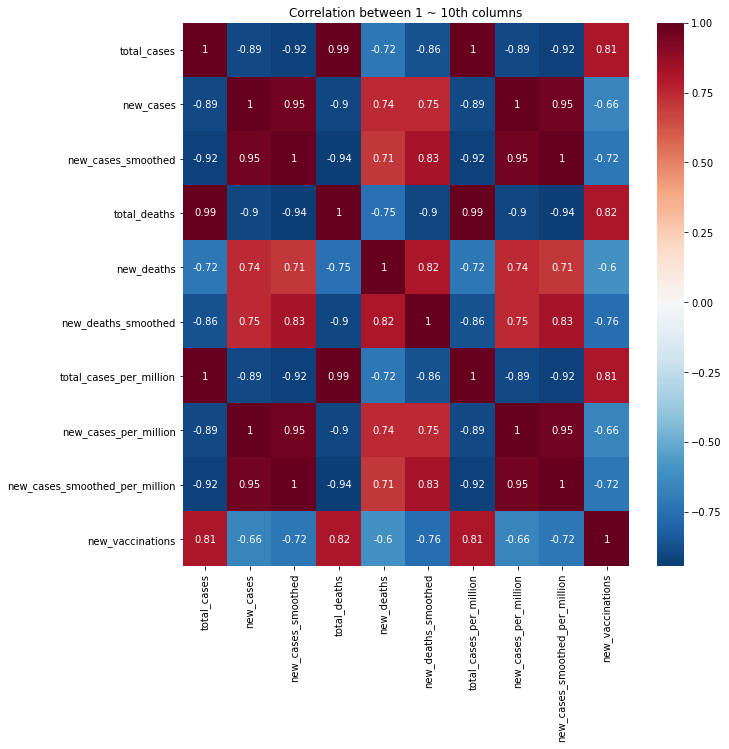

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
co_cols = cols[:10]
co_cols.append('new_vaccinations')
sns.heatmap(usadf[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 1 ~ 10th columns')
plt.show()

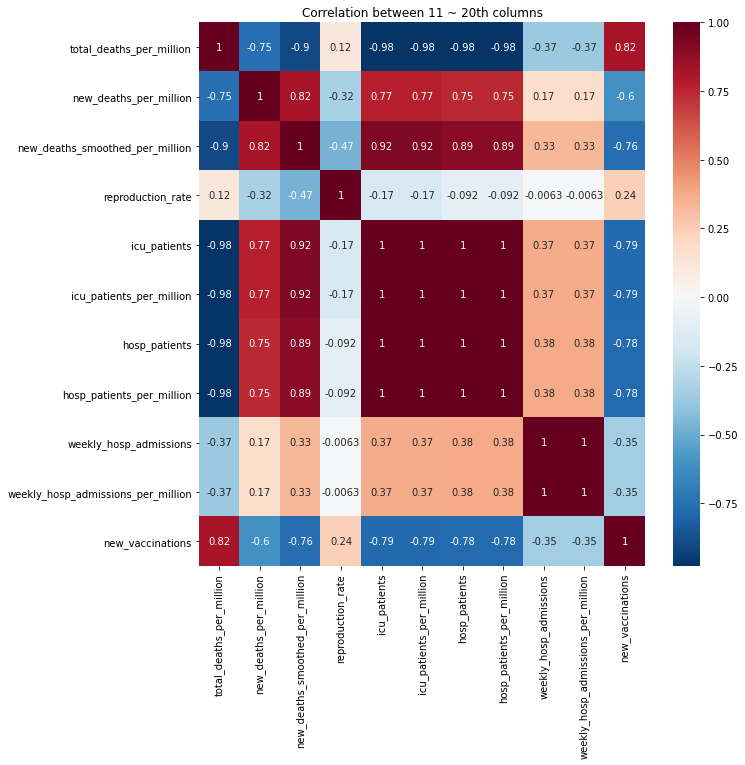

In [18]:
corr_remove = []
co_cols = cols[10:20]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(usadf[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 11 ~ 20th columns')
plt.show()

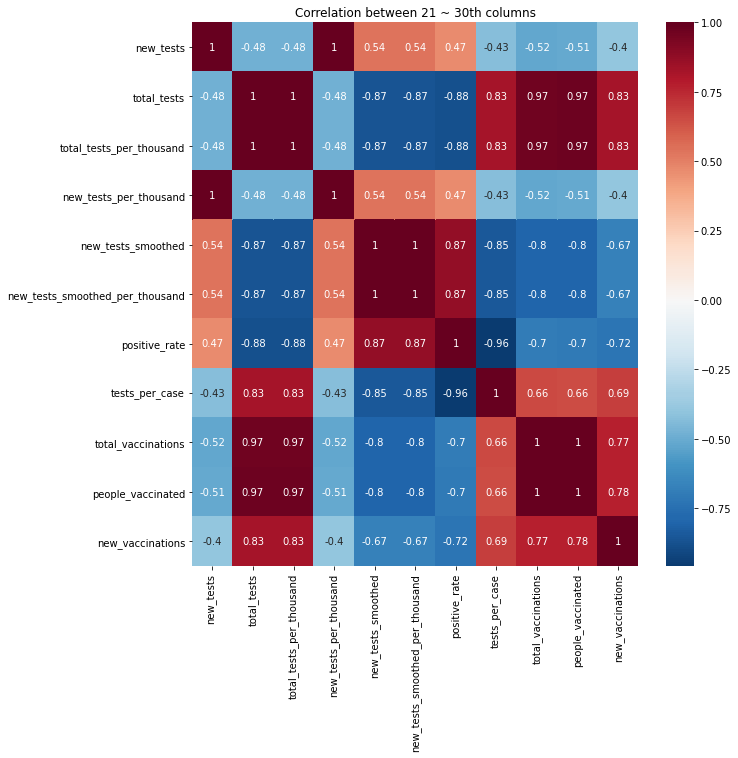

In [19]:
corr_remove = []
co_cols = cols[20:30]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(usadf[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 21 ~ 30th columns')
plt.show()

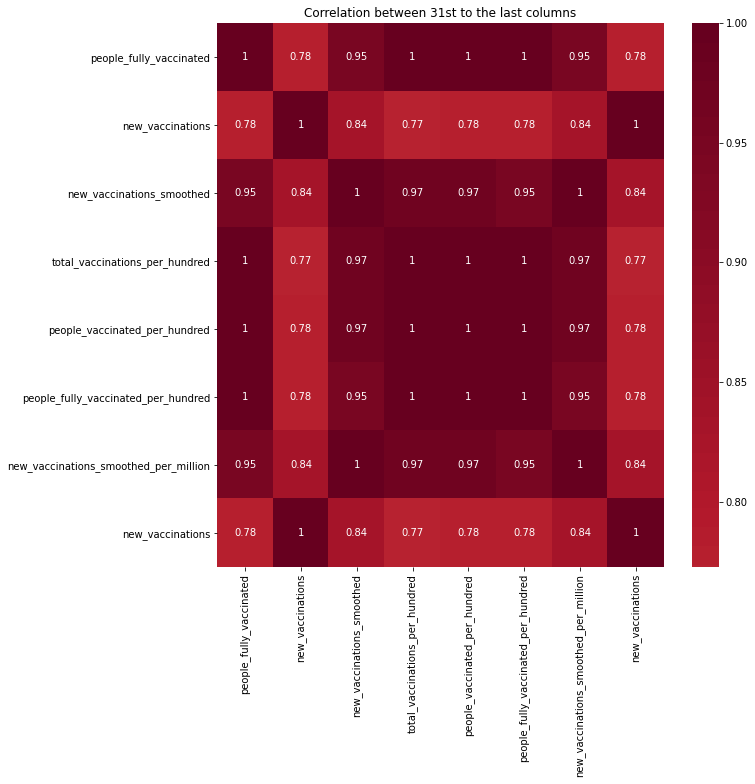

In [20]:
corr_remove = []
co_cols = cols[30:]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(usadf[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 31st to the last columns')
plt.show()

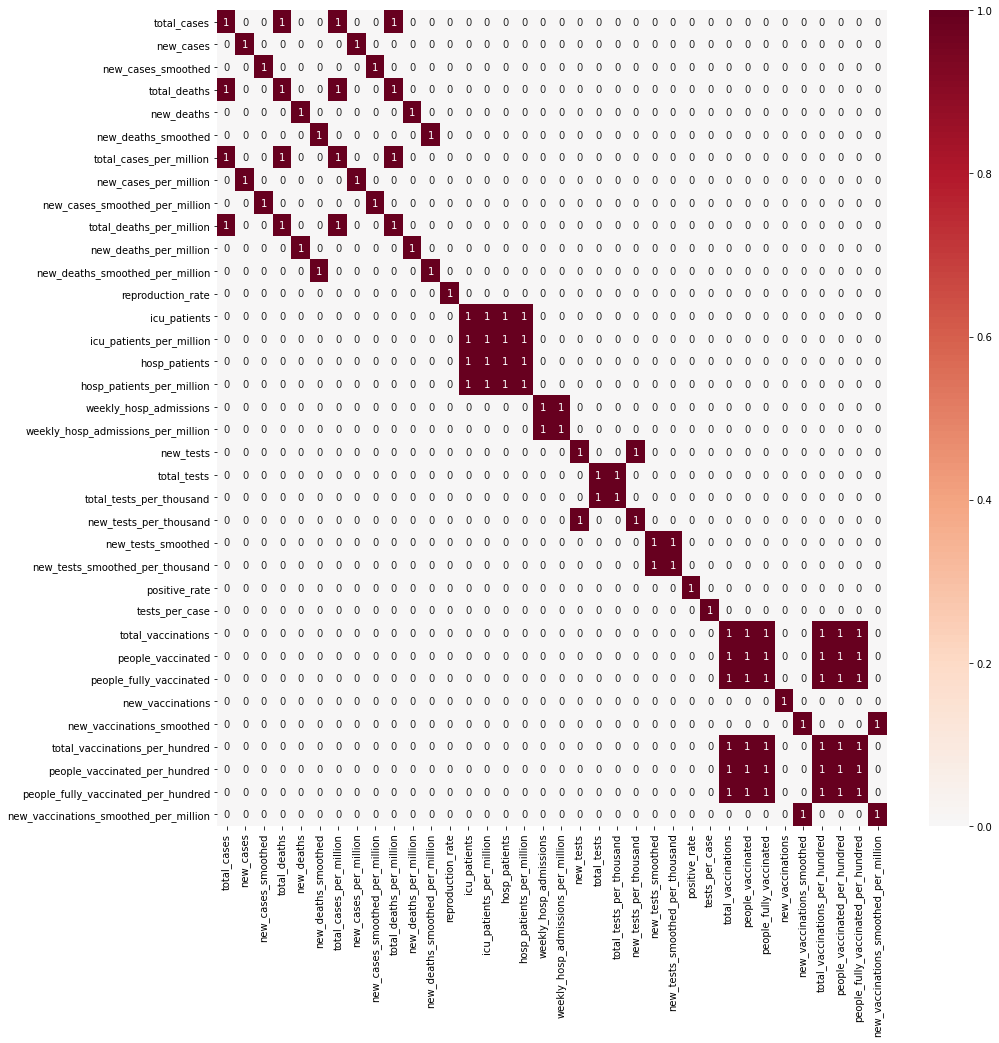

In [21]:
corr = usadf.corr()
high_corr = (corr >= 0.99).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

### 7. Plot the line graph to see the trend (Cases versus Vaccinations).



In [22]:
usadf2 = usadf[(usadf["date"]=='31/1/2021')|(usadf["date"]=='28/2/2021')|(usadf["date"]=='31/3/2021')]

In [23]:
usadf2.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million
22446,31/1/2021,26247053.0,111997.0,148991.571,449325.0,1850.0,3177.857,79295.599,338.357,450.122,1357.466,5.589,9.601,0.83,22478.0,67.909,91293.0,275.807,80591.0000,243.475,944090.0,308199228.0,931.108,2.852,1591177.0,4.807,0.091,11.0,31123299.0,25201143.0,5657142.0,1545397.0,1324949.0,9.31,7.54,1.69,3962.0
22474,28/2/2021,28648744.0,51357.0,67713.429,514943.0,1094.0,1985.286,86551.405,155.156,204.571,1555.707,3.305,5.998,0.89,11551.0,34.897,44802.0,135.352,41724.0000,126.053,625307.0,344592349.0,1041.056,1.889,1295098.0,3.913,0.052,19.2,75236003.0,49772180.0,24779920.0,2429823.0,1735053.0,22.50,14.88,7.41,5188.0
22505,31/3/2021,30462210.0,67039.0,64042.857,552430.0,1086.0,932.857,92030.110,202.533,193.481,1668.959,3.281,2.818,1.04,8506.0,25.698,35529.0,107.338,60806.1875,183.703,1553004.0,382862566.0,1156.675,4.692,1203103.0,3.635,0.053,18.9,150273292.0,97593290.0,54607041.0,2670947.0,2828491.0,44.93,29.18,16.33,8457.0


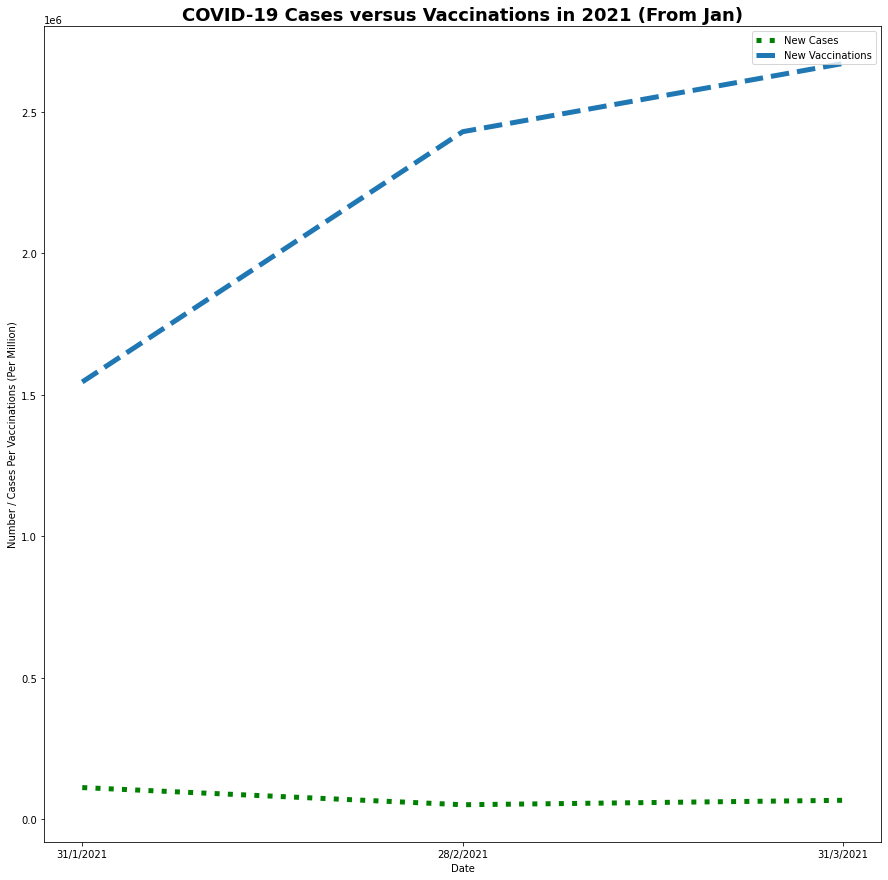

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(usadf2['date'],usadf2['new_cases'],color='green', linestyle=':', label='New Cases',linewidth = 5)
ax.plot(usadf2['date'],usadf2['new_vaccinations'], linestyle='--', label = 'New Vaccinations',linewidth = 5)
#ax.plot((usadf2['date'],log(usadf2['new_cases']), color='red', linestyle='*', label='New Cases',linewidth = 2.5)
#ax.plot(usadf2['date'],log(usadf2['new_vaccinations']), color='yellow', linestyle='o', label = 'New Vaccinations',linewidth = 2.5)

ax.legend(loc=1) #

ax.set_title('COVID-19 Cases versus Vaccinations in 2021 (From Jan)', fontweight='bold',fontsize=18) 


ax.set_xlabel('Date')
ax.set_ylabel('Number / Cases Per Vaccinations (Per Million)');



In [25]:
usadf.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million
count,1.120000e+02,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,110.000000,107.000000,107.000000,107.000000,107.000000,112.000000,112.000000,1.100000e+02,1.100000e+02,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000,1.040000e+02,1.030000e+02,1.120000e+02,1.120000e+02,1.120000e+02,104.000000,103.000000,112.000000,112.000000
mean,2.775942e+07,105624.892857,109632.243616,491824.973214,1948.767857,2011.139018,83864.646366,319.105911,331.212589,1485.864232,5.887464,6.075920,0.932000,16212.411215,48.979738,67394.130841,203.606000,60806.187500,183.703000,1.342694e+06,3.379257e+08,1020.915464,4.056473,1.371791e+06,4.144364,0.074927,15.489091,9.027801e+07,6.040103e+07,2.905401e+07,1.842151e+06,1.863729e+06,26.993462,18.060680,8.687054,5572.651786
std,3.055251e+06,65359.752085,64476.651234,64831.193257,1182.761062,965.925139,9230.290262,197.459929,194.791881,195.863062,3.573281,2.918153,0.110825,7790.419893,23.535838,35180.151050,106.283584,11518.731627,34.799496,4.342780e+05,4.250799e+07,128.421892,1.312039,2.251765e+05,0.680243,0.032040,5.292254,6.414945e+07,3.909420e+07,2.706950e+07,1.141121e+06,8.937035e+05,19.180986,11.689002,8.093988,2672.210789
min,2.025299e+07,33768.000000,53663.000000,354232.000000,281.000000,697.714000,61186.795000,102.017000,162.123000,1070.179000,0.849000,2.108000,0.730000,8113.000000,24.510000,33164.000000,100.193000,33046.000000,99.836000,4.611750e+05,2.580375e+08,779.563000,1.393000,9.418230e+05,2.845000,0.043000,7.000000,4.225756e+06,4.225756e+06,0.000000e+00,0.000000e+00,3.023290e+05,1.260000,1.260000,0.000000,904.000000
25%,2.595110e+07,61267.000000,63911.857000,443781.000000,929.000000,994.035750,78401.494250,185.095000,193.085250,1340.717750,2.806750,3.002750,0.850000,9120.000000,27.552500,36774.000000,111.099000,60806.187500,183.703000,1.001920e+06,3.044611e+08,919.815000,3.027000,1.198838e+06,3.622000,0.051250,10.375000,3.360391e+07,2.753008e+07,4.147555e+06,1.080496e+06,1.249194e+06,10.047500,8.230000,1.237500,3735.250000
50%,2.849414e+07,75206.500000,69646.714000,511300.500000,1639.500000,1976.143000,86084.324000,227.208000,210.411500,1544.702000,4.953000,5.970500,0.915000,13334.000000,40.284000,51820.000000,156.555000,60806.187500,183.703000,1.404399e+06,3.406509e+08,1029.149000,4.243000,1.270452e+06,3.838000,0.058000,17.200000,7.776579e+07,5.175545e+07,2.208424e+07,1.763806e+06,1.664868e+06,23.250000,15.480000,6.605000,4978.000000
75%,3.010071e+07,142588.000000,156621.893000,547592.500000,2745.500000,3059.571000,90937.959250,430.776000,473.174500,1654.344500,8.294750,9.243000,1.040000,24058.500000,72.683500,101169.000000,305.644000,60806.187500,183.703000,1.594536e+06,3.740334e+08,1130.001250,4.817250,1.543973e+06,4.664250,0.096250,19.500000,1.410012e+08,9.266945e+07,4.773867e+07,2.568706e+06,2.562300e+06,42.157500,27.710000,14.275000,7661.750000
max,3.192935e+07,300310.000000,251056.857000,570345.000000,4474.000000,3431.143000,96462.525000,907.274000,758.474000,1723.083000,13.517000,10.366000,1.110000,30028.000000,90.718000,129800.000000,392.142000,116374.000000,351.580000,2.311182e+06,4.044969e+08,1222.035000,6.982000,1.868988e+

In [26]:
usadf['date'] = pd.to_datetime(usadf['date'], format='%d/%m/%Y')
X = usadf[['new_vaccinations']]
Y = usadf['new_cases']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
new_vaccinations,-0.031027


In [30]:
Y_pred = regressor.predict(X_test)

In [31]:
predictdf = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

In [32]:
predictdf = predictdf.sort_values(by='Actual', ascending=False)

In [33]:
predictdf

,Actual,Predicted
22417,300310.0,155915.710909
22423,295215.0,132061.372851
22422,278290.0,136907.618648
22424,260695.0,155915.710909
22429,235707.0,128905.380626
22420,235111.0,147438.721255
22427,226920.0,145372.073195
22426,214994.0,155915.710909
22418,208746.0,155915.710909
22431,201680.0,155915.710909


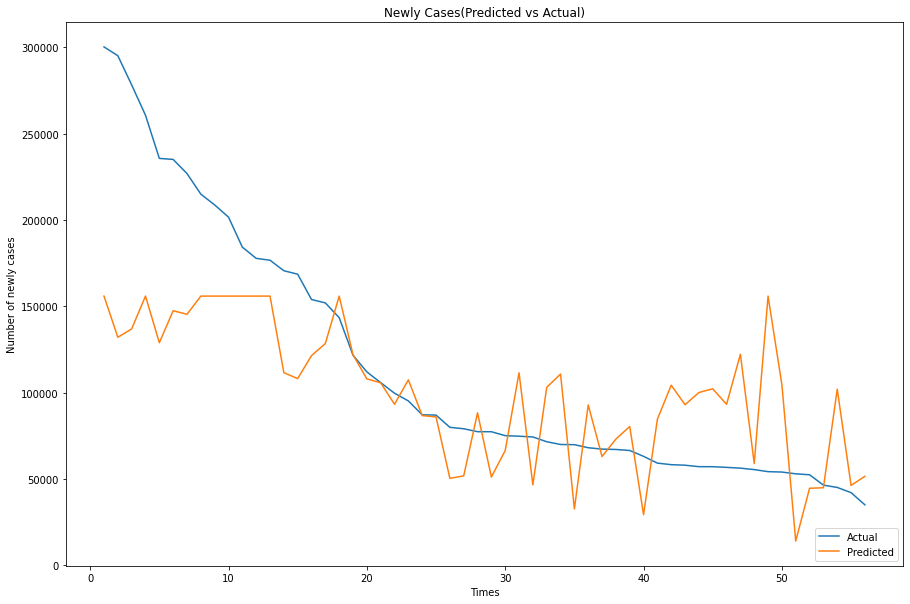

In [34]:
N = 56
x = np.arange(1,N+1)

plt.figure(figsize=(15, 10))
plt.plot(x,predictdf['Actual'], label = 'Actual')
plt.plot(x,predictdf['Predicted'], label = 'Predicted')

plt.title("Newly Cases(Predicted vs Actual)")
plt.xlabel("Times")
plt.ylabel("Number of newly cases")
plt.legend(loc='lower right')